In [1]:
%matplotlib inline

In [2]:
import lightkurve as lk
import matplotlib.pyplot as plt

In [3]:
plt.rc('text', usetex=True)

In [4]:
from dt_lightcurve import detrend_light_curve

In [5]:
search_result = lk.search_lightcurve('KIC 11502867', author='Kepler', quarter=14)

In [6]:
lc = search_result.download()

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

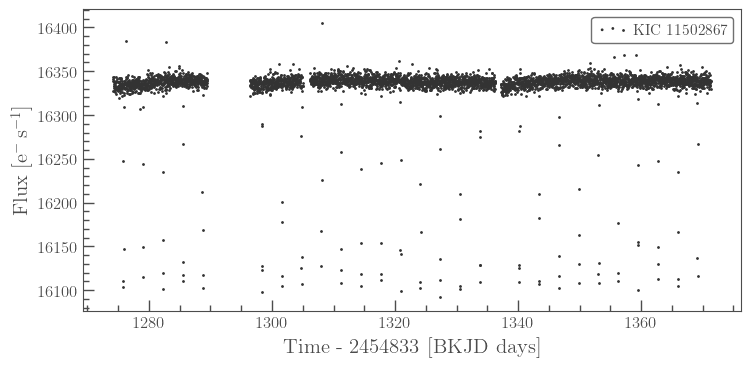

In [7]:
lc.scatter()

In [8]:
flatten_lc = detrend_light_curve(lc)

In [9]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

In [10]:
def split_light_curve(lc_object, split_time=10, back_step=3):
    if (lc_object.time.value[-1] - lc_object.time.value[0]) < split_time:
        yield lc_object.time.value[0], lc_object.time.value[-1]
    time_start = lc_object.time.value[0]
    while time_start < lc_object.time.value[-1]:
        time_stop = time_start + split_time
        if time_stop > lc_object.time.value[-1]:
            yield time_start, lc_object.time.value[-1]
            break
        else:
            yield time_start, time_stop
            time_start = time_stop - back_step

In [11]:
import numpy as np

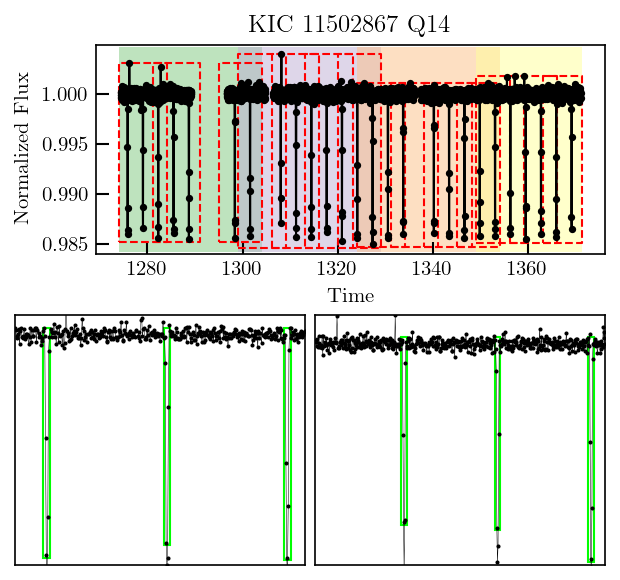

In [12]:
fig = plt.figure(figsize=(4,4), dpi=150, constrained_layout=True)
ax = plt.subplot(211)
ax.plot(flatten_lc.time.value, flatten_lc.flux.value, 'k.-', lw=1, ms=5)
ax.set_title('KIC 11502867 Q14')
ax.set_xlabel('Time')
ax.set_ylabel('Normalized Flux')
# for 
# flatten_lc = flatten_lc.remove_nans()
recs = []
# rec = Rectangle((real_mask[1] - real_mask[3] / 2, real_mask[2] - real_mask[4] / 2),
#                         real_mask[3],
#                         real_mask[4], fill=False, color='lime')
# recs.append(rec)
# pc = PatchCollection(recs, facecolor='none', edgecolor='lime', lw=1)
# ax.add_collection(pc)
for i, (t0, t1) in enumerate(split_light_curve(flatten_lc, 30, 5)):
    mask = (flatten_lc.time.value >= t0) & (flatten_lc.time.value <= t1)
    selected_lc = flatten_lc[mask]
    if len(selected_lc) < 20 / 0.0204:
        continue
    ax.axvspan(t0, t1, fc=plt.get_cmap("Accent")(i), ec='none', alpha=0.5, lw=2, ymin=0.01, ymax=0.99)
    for j, (t0, t1) in enumerate(split_light_curve(selected_lc, 10, 3)):
        mask = (selected_lc.time.value >= t0) & (selected_lc.time.value <= t1)
        temp_lc = selected_lc[mask]
        if len(temp_lc) < 5 / 0.0204:
            continue
        flux_min, flux_max = np.nanmin(selected_lc.flux.value) * 1.02 - 0.02 * np.nanmax(selected_lc.flux.value), np.nanmax(
        selected_lc.flux.value)
#         print(t0, t1,  flux_min, flux_max)
        recs.append(Rectangle((t0, flux_min), t1-t0, flux_max-flux_min))
#         ax.axvspan(t0, t1, fc='none', ec=plt.get_cmap("tab10")(j))
pc = PatchCollection(recs, facecolor='none', edgecolor='red', lw=1, zorder=2, ls='--')
ax.add_collection(pc)
ax.set_rasterized(True)

# ax.annotate('', (1285, 0), xycoords='data',
#             xytext=(1280, 1), textcoords='data',
#             arrowprops=dict(facecolor='red', shrink=0.05),
#             fontsize=16,
#             horizontalalignment='right', verticalalignment='top')

ax2 = plt.subplot(223)
sub_lc1 = flatten_lc[(flatten_lc.time.value>=1281.425427428243)&(flatten_lc.time.value<=1291.425427428243)]
ax2.plot(sub_lc1.time.value, sub_lc1.flux.value, ls='-', marker='o', lw=72 / fig.dpi / 2, ms=72 / fig.dpi * 2,
            color='black')
ax2.add_patch(Rectangle((1282.1950983333334, 0.9864912080685841), 
                        0.18308333333334303, 0.013942774556514319, 
                        facecolor='none', edgecolor='lime', lw=1))
ax2.add_patch(Rectangle((1285.4126183333333, 0.9872469165715856), 
                        0.18308333333334303, 0.013187066053512912, 
                        facecolor='none', edgecolor='lime', lw=1))
ax2.add_patch(Rectangle((1288.6301383333334, 0.9863423545697991), 
                        0.18308333333334303, 0.014091628055299473, 
                        facecolor='none', edgecolor='lime', lw=1))
ax2.set_ylim([0.9860511970723895, 1.0011940705615412])
ax2.margins(0, 0)
ax2.tick_params(bottom=False,left=False, labelbottom=False, labelleft=False)
# ax2.set_xlabel('Time')
# ax2.set_ylabel('Normalized Flux')

ax3 = plt.subplot(224)
sub_lc2 = flatten_lc[(flatten_lc.time.value>=1356.4378896127091)&(flatten_lc.time.value<=1366.4378896127091)]
ax3.plot(sub_lc2.time.value, sub_lc2.flux.value, ls='-', marker='o', lw=72 / fig.dpi / 2, ms=72 / fig.dpi * 2,
            color='black')
ax3.add_patch(Rectangle((1359.4074056111588, 0.988448506216308), 
                        0.19942877768233302, 0.011997810501207436, 
                        facecolor='none', edgecolor='lime', lw=1))
ax3.add_patch(Rectangle((1362.624925611159, 0.9881311621266038), 
                        0.19942877768233302, 0.012315154590911804, 
                        facecolor='none', edgecolor='lime', lw=1))
ax3.add_patch(Rectangle((1365.8424456111588, 0.9860412588675178), 
                        0.19942877768233302, 0.01440505784999773, 
                        facecolor='none', edgecolor='lime', lw=1))
ax3.tick_params(bottom=False,left=False, labelbottom=False, labelleft=False)
ax3.margins(0, 0)
ax3.set_ylim([0.9858709415507186, 1.0018309658000497])

fig.set_constrained_layout_pads(w_pad=5 / fig.dpi, h_pad=25 / fig.dpi, hspace=0, wspace=0)
# fig.savefig('preprocessing.pdf')

<AxesSubplot:xlabel='Time [JD]', ylabel='Flux'>

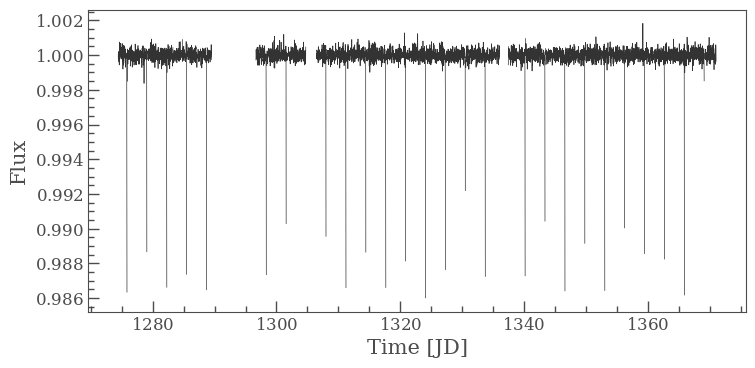

In [14]:
flatten_lc.plot()